Result: 15.625


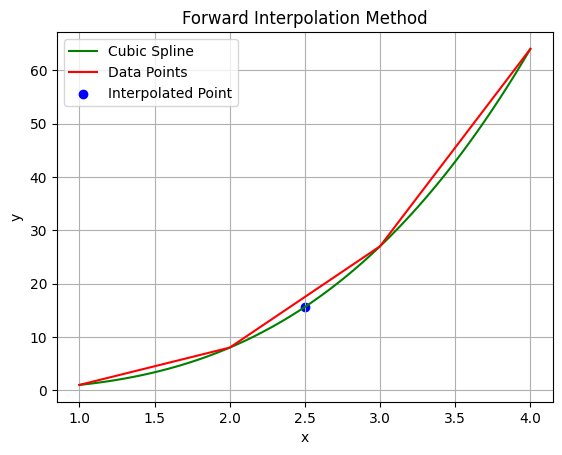

In [2]:
# some libs
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

def forward_interpolation_method(data, x_n):
    arr = []
    arr.append([x for x, y in data])
    arr.append([y for x, y in data])

    for i in range(2, 5): # 5 is arbitrary
        temp = []
        for j in range(len(arr[i-1])-1):
            temp.append(arr[i-1][j+1] - arr[i-1][j])
        arr.append(temp)

    u = x_n - arr[0][0] / ((arr[0][1] - arr[0][0]))

    first = arr[1][0]
    second = arr[2][0] * u
    third = arr[3][0] * u * (u - 1) / 2
    fourth = arr[4][0] * u * (u - 1) * (u - 2) / 6
    result = first + second + third + fourth

    print("Result:", result)
    return result    

data = [(1, 1), (2, 8), (3, 27), (4, 64)]
x_n = 2.5
y_n = forward_interpolation_method(data, x_n)

x, y = zip(*data)
x, y = np.array(x), np.array(y)
fn = interp1d(x, y, kind='cubic')
x_new = np.linspace(x.min(), x.max(), 100)
y_new = fn(x_new)

plt.plot(x_new, y_new, label='Cubic Spline', color='green')
plt.plot(*zip(*data), color='red', label='Data Points')
plt.scatter(x_n, y_n, color='blue', label='Interpolated Point')
plt.title('Forward Interpolation Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()    